<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sales     157 non-null    float64
 1   resale    157 non-null    object 
 2   price     157 non-null    object 
 3   engine_s  157 non-null    object 
 4   horsepow  157 non-null    object 
 5   wheelbas  157 non-null    object 
 6   width     157 non-null    object 
 7   length    157 non-null    object 
 8   curb_wgt  157 non-null    object 
 9   fuel_cap  157 non-null    object 
 10  mpg       157 non-null    object 
 11  lnsales   157 non-null    float64
dtypes: float64(2), object(10)
memory usage: 14.8+ KB
sales       float64
resale       object
price        object
engine_s     object
horsepow     object
wheelbas     object
width        object
length       object
curb_wgt     object
fuel_cap     object
mpg          object
lnsales     float64
dtype: object
18.142257511213614


/Users/abhishekrotti/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:347: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set_ylim(0, auto=None)


4.6746637642142055

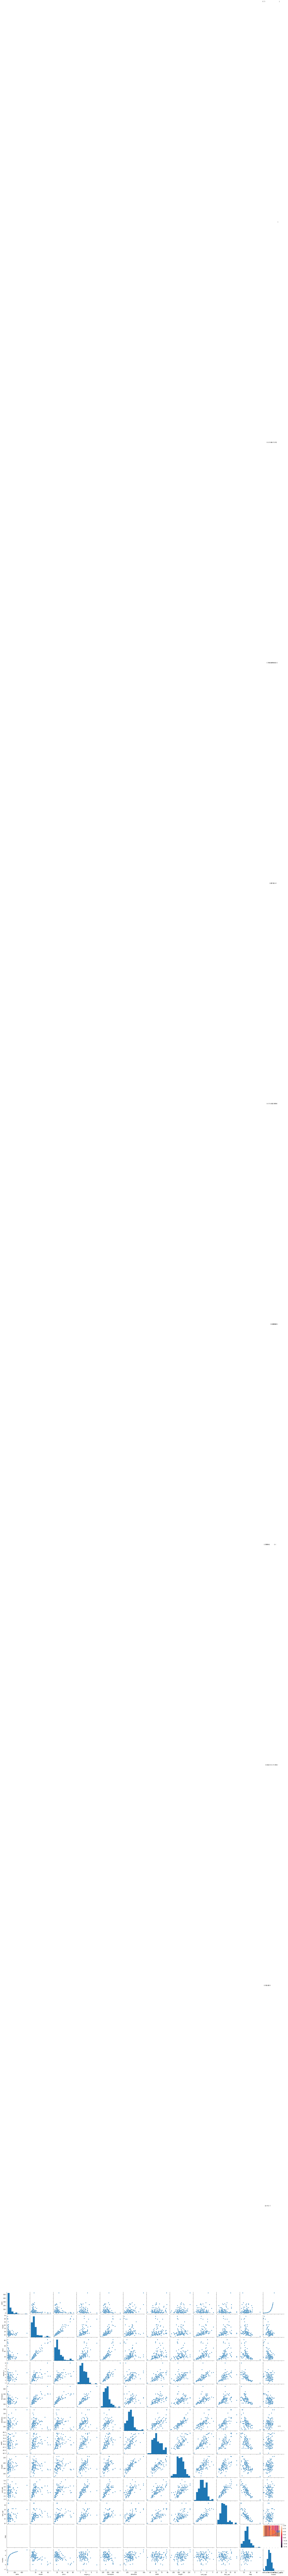

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns

dataset = pd.read_csv('car_sales_2.csv')
dataset.head()

dataset.info()

nan_value = float('NaN')
dataset.replace(' ', nan_value, inplace=True)
dataset.dropna(inplace=True)

nan_value = float('NaN')
dataset.replace('', nan_value, inplace=True)
dataset.dropna(inplace=True)

print(dataset.dtypes)
dataset = dataset.astype(float)

sns.pairplot(dataset)

sns.distplot(dataset['price'])

sns.heatmap(dataset.corr(), annot=True, linewidths=2)

X=dataset[['sales', 'resale', 'mpg']]

y=dataset['price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

print(lr.intercept_)

lr.coef_

cdf = pd.DataFrame(lr.coef_, X_train.columns, columns=['Coeff'])

cdf

predictions = lr.predict(X_test)

plt.scatter(y_test, predictions)

sns.distplot((y_test - predictions))

from sklearn import metrics

metrics.mean_absolute_error(y_test, predictions)

MSE = metrics.mean_squared_error(y_test, predictions)
MSE

np.sqrt(MSE)